In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl
import seaborn as sns
from seaborn import set_style

import os

from datetime import datetime
import time
set_style("whitegrid")

In [2]:
df = pd.read_csv('csv_files/train/train_base.csv')

In [3]:
df.shape

(1526659, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526659 entries, 0 to 1526658
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   case_id        1526659 non-null  int64 
 1   date_decision  1526659 non-null  object
 2   MONTH          1526659 non-null  int64 
 3   WEEK_NUM       1526659 non-null  int64 
 4   target         1526659 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 58.2+ MB


In [5]:
df.head(10)

,case_id,date_decision,MONTH,WEEK_NUM,target
0,0,2019-01-03,201901,0,0
1,1,2019-01-03,201901,0,0
2,2,2019-01-04,201901,0,0
3,3,2019-01-03,201901,0,0
4,4,2019-01-04,201901,0,1
5,5,2019-01-02,201901,0,0
6,6,2019-01-03,201901,0,0
7,7,2019-01-03,201901,0,0
8,8,2019-01-03,201901,0,0
9,9,2019-01-03,201901,0,0


In [6]:
df.WEEK_NUM.value_counts()

WEEK_NUM
51    35920
47    31888
49    30938
45    28947
23    26734
      ...  
70     3808
66     2278
69     1582
67     1434
68      825
Name: count, Length: 92, dtype: int64

In [7]:
weeks = np.arange(91)

In [8]:
classes = {
    "default": np.array([len(df[(df.WEEK_NUM == week) & (df.target == 1)]) for week in weeks]),
    "no_default": np.array([len(df[(df.WEEK_NUM == week) & (df.target == 0)]) for week in weeks]),
}

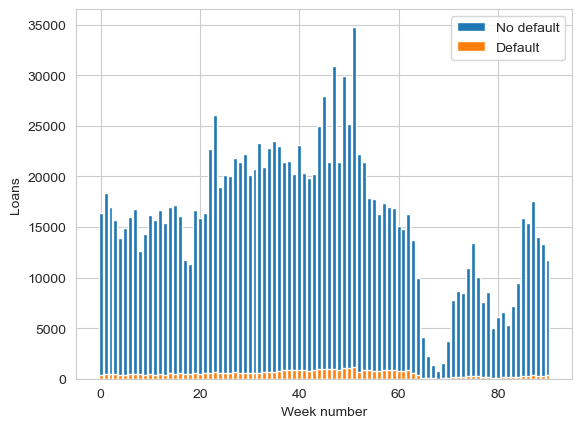

In [10]:
plt.bar(weeks,classes['no_default'],label='No default')
plt.bar(weeks,classes['default'],label='Default')
plt.xlabel('Week number')
plt.ylabel('Loans')
plt.legend()


Text(0, 0.5, 'Default proportion')

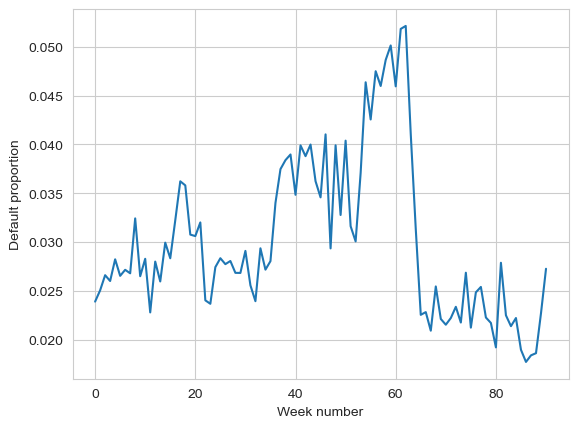

In [12]:
plt.plot(weeks,classes['default']/(classes['default']+classes['no_default']))
plt.xlabel('Week number')
plt.ylabel('Default proportion')

In [13]:
from features_dictionary import *

In [14]:
path_train_num = 'csv_files/train-num/'
path_train_copy = 'csv_files/train - Copy/'

In [15]:
FILES2 = os.listdir(path_train_num)
FILES3 = [FILES2[3]] + FILES2[1:3] + FILES2[8:10]

In [16]:
df  = pd.read_csv(path_train_num + FILES3[0])
df2 = pd.read_csv(path_train_num + FILES3[1])
df3 = pd.read_csv(path_train_num + FILES3[2])
df4 = pd.read_csv(path_train_num + FILES3[3])
df5 = pd.read_csv(path_train_num + FILES3[4])

In [18]:
FILES3

['train_base.csv',
 'train_applprev_1_0.csv',
 'train_applprev_1_1.csv',
 'train_static_0_0.csv',
 'train_static_0_1.csv']

In [19]:
DF1 = pd.concat([df2,df3])
DF2 = pd.concat([df4,df5])

In [20]:
df6 = df.merge(DF1, on='case_id', how='left')
df7 = df6.merge(DF2, on='case_id', how='left')
df8 = df7.dropna()

In [21]:
df8.columns

Index(['case_id', 'date_decision', 'MONTH', 'WEEK_NUM', 'target',
       'actualdpd_943P', 'annuity_853A', 'credacc_credlmt_575A',
       'credamount_590A', 'downpmt_134A', 'mainoccupationinc_437A',
       'annuity_780A', 'annuitynextmonth_57A', 'credamount_770A',
       'currdebt_22A', 'currdebtcredtyperange_828A',
       'disbursedcredamount_1113A', 'downpmt_116A', 'posfpd10lastmonth_333P',
       'posfpd30lastmonth_3976960P', 'posfstqpd30lastmonth_3976962P',
       'totaldebt_9A', 'totalsettled_863A'],
      dtype='object')

In [22]:
df8.shape

(708859, 23)

<Axes: xlabel='annuity_780A', ylabel='annuity_853A'>

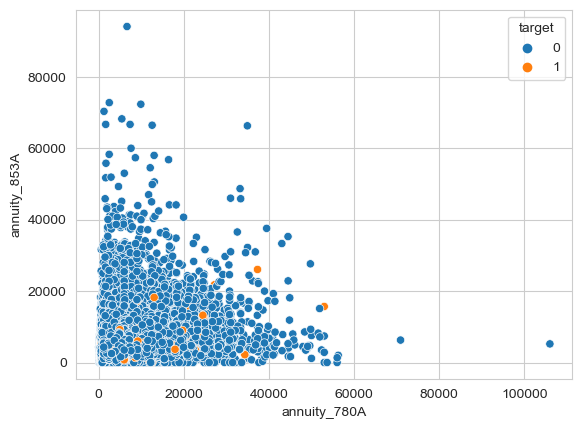

In [23]:
sns.scatterplot(x = df8.annuity_780A,
                y = df8.annuity_853A,
              hue = df8.target)

<Axes: xlabel='currdebt_22A', ylabel='credamount_590A'>

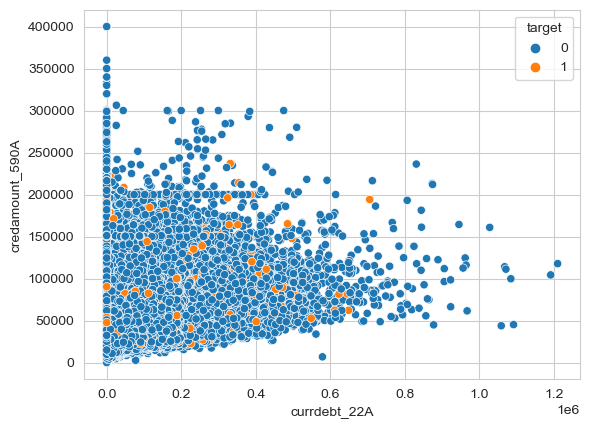

In [24]:
sns.scatterplot(x = df8.currdebt_22A,
                y = df8.credamount_590A,
              hue = df8.target)

<Axes: xlabel='credamount_770A', ylabel='credamount_590A'>

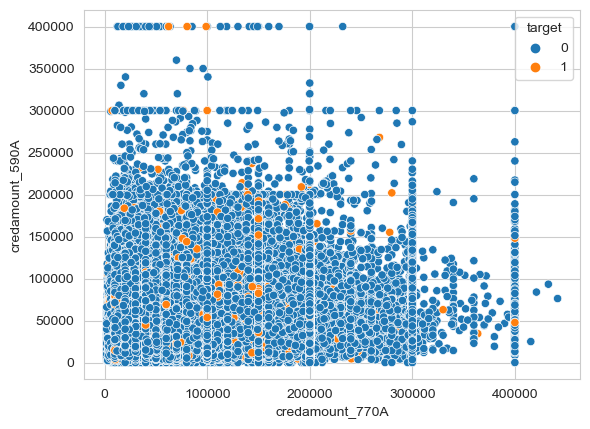

In [25]:
sns.scatterplot(x = df8.credamount_770A,
                y = df8.credamount_590A,
              hue = df8.target)